In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns

In [2]:
from google.colab import data_table

## Download Dataset

In [3]:
!curl -L -o amazon-fine-food-reviews.zip https://www.kaggle.com/api/v1/datasets/download/snap/amazon-fine-food-reviews

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  242M  100  242M    0     0  68.7M      0  0:00:03  0:00:03 --:--:-- 89.7M


In [22]:
with zipfile.ZipFile("amazon-fine-food-reviews.zip") as z:
   with z.open("Reviews.csv") as f:
      df_review_raw = pd.read_csv(f)

df_review_raw.info()
df_review_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Data:
01. Id : Nomor baris
02. ProductId : Product ID Unik
03. UserId : User Id Unik
04. ProfileName : Nama Pengguna
05. HelpfulnessNumerator : Jumlah user yang merasa review ini membantu
06. HelpfulnessDenominator : Jumlah user yang bereaksi terhadap review entah itu membantu atau tidak
08. Score : Rating produk 1 - 5
09. Time : Waktu pengguna review
10. Summary : Inti dari review
11. Text : Review dari pengguna

## Hapus ProfileName, Text, dan Summary karena tidak dibutuhkan untuk analisis

In [29]:
selected_columns = list(set(df_review_raw.columns) - set(['ProfileName', 'Text', 'Summary']))
df_review = df_review_raw[selected_columns]

df_review.info()
df_review.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   UserId                  568454 non-null  object
 1   Id                      568454 non-null  int64 
 2   ProductId               568454 non-null  object
 3   HelpfulnessDenominator  568454 non-null  int64 
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 30.4+ MB


,UserId,Id,ProductId,HelpfulnessDenominator,HelpfulnessNumerator,Score,Time
0,A3SGXH7AUHU8GW,1,B001E4KFG0,1,1,5,1303862400
1,A1D87F6ZCVE5NK,2,B00813GRG4,0,0,1,1346976000
2,ABXLMWJIXXAIN,3,B000LQOCH0,1,1,4,1219017600
3,A395BORC6FGVXV,4,B000UA0QIQ,3,3,2,1307923200
4,A1UQRSCLF8GW1T,5,B006K2ZZ7K,0,0,5,1350777600


### Check Duplikasi

In [30]:
df_review[df_review.duplicated()]

,UserId,Id,ProductId,HelpfulnessDenominator,HelpfulnessNumerator,Score,Time


setelah dilihat tidak ada duplikasi secara general

Tetapi dibuat aturan jika 1 user hanya berkomentar di suatu product 1 kali yaitu komentar terakhir saja. Data duplikasi:

In [31]:
df_review[df_review.duplicated(subset=['ProductId','UserId'], keep='last')]

,UserId,Id,ProductId,HelpfulnessDenominator,HelpfulnessNumerator,Score,Time
422,A2NO1TXXS9T0EE,423,B000G6RYNE,0,0,4,1335398400
423,A1IRN1M05TPOVT,424,B000G6RYNE,0,0,5,1334620800
425,A1Y3XPZK9ZADFW,426,B000G6RYNE,0,0,4,1334016000
431,A2OEUROGZDTXUJ,432,B000G6RYNE,0,0,5,1327881600
434,A15USNEAJUXOSH,435,B000G6RYNE,0,0,4,1326067200
...,...,...,...,...,...,...,...
568007,A20P8VC55KPPCT,568008,B0030VJ8YU,3,3,5,1274486400
568008,ATIHDHZYNQ0EI,568009,B0030VJ8YU,3,3,5,1270425600
568017,A20P8VC55KPPCT,568018,B0030VJ8YU,2,2,5,1274486400
568059,A39WWOFLLOQC3L,568060,B0030VJ8YU,3,2,4,1289952000


## Data Cleaning (Process)

In [32]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   UserId                  568454 non-null  object
 1   Id                      568454 non-null  int64 
 2   ProductId               568454 non-null  object
 3   HelpfulnessDenominator  568454 non-null  int64 
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 30.4+ MB


### ubah tipe data Time dari integer menjadi datetime

In [33]:
df_review_cleaned = df_review.copy()
df_review_cleaned['Time'] = pd.to_datetime(df_review_cleaned["Time"], unit="s")
df_review_cleaned.info()
df_review_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   UserId                  568454 non-null  object        
 1   Id                      568454 non-null  int64         
 2   ProductId               568454 non-null  object        
 3   HelpfulnessDenominator  568454 non-null  int64         
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   Score                   568454 non-null  int64         
 6   Time                    568454 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 30.4+ MB


,UserId,Id,ProductId,HelpfulnessDenominator,HelpfulnessNumerator,Score,Time
0,A3SGXH7AUHU8GW,1,B001E4KFG0,1,1,5,2011-04-27
1,A1D87F6ZCVE5NK,2,B00813GRG4,0,0,1,2012-09-07
2,ABXLMWJIXXAIN,3,B000LQOCH0,1,1,4,2008-08-18
3,A395BORC6FGVXV,4,B000UA0QIQ,3,3,2,2011-06-13
4,A1UQRSCLF8GW1T,5,B006K2ZZ7K,0,0,5,2012-10-21


### dihapus duplikat value yaitu ketika pengguna mengomentari produk lebih dari 1 maka yang digunakan terakhir saja

In [34]:
df_review_cleaned = df_review_cleaned.sort_values(by='Time', ascending=True)
df_review_cleaned = df_review_cleaned.drop_duplicates(subset=['ProductId', 'UserId'], keep='last') # keep the last review
df_review_cleaned = df_review_cleaned.reset_index()

df_review_cleaned.info()
df_review_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560804 entries, 0 to 560803
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   index                   560804 non-null  int64         
 1   UserId                  560804 non-null  object        
 2   Id                      560804 non-null  int64         
 3   ProductId               560804 non-null  object        
 4   HelpfulnessDenominator  560804 non-null  int64         
 5   HelpfulnessNumerator    560804 non-null  int64         
 6   Score                   560804 non-null  int64         
 7   Time                    560804 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 34.2+ MB


,index,UserId,Id,ProductId,HelpfulnessDenominator,HelpfulnessNumerator,Score,Time
0,150523,ACITT7DI6IDDL,150524,0006641040,0,0,5,1999-10-08
1,150500,AJ46FKXOVC7NR,150501,0006641040,2,2,5,1999-10-25
2,451855,AIUWLEQ1ADEG5,451856,B00004CXX9,0,0,5,1999-12-02
3,230284,A344SMIA5JECGM,230285,B00004RYGX,2,1,5,1999-12-06
4,451877,A344SMIA5JECGM,451878,B00004CXX9,2,1,5,1999-12-06


## Data Engineering for Clustering

Beberapa hal yang akan digunakan untuk clusteringL
1. recency (time aspect) : sudah berapa hari menjadi reviewer (sejak review pertama sampai review terakhir)
2. review_frequency (frequency) : seberapa banyak review yang dia kirimkan
3. helpfulness : kualitas dari review (membantu/tidak)

In [74]:
df_review_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560804 entries, 0 to 560803
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   index                   560804 non-null  int64         
 1   UserId                  560804 non-null  object        
 2   Id                      560804 non-null  int64         
 3   ProductId               560804 non-null  object        
 4   HelpfulnessDenominator  560804 non-null  int64         
 5   HelpfulnessNumerator    560804 non-null  int64         
 6   Score                   560804 non-null  int64         
 7   Time                    560804 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 34.2+ MB


### Recency

In [75]:
df_segmentation_dataset_draft = df_review_cleaned.groupby(['UserId']).agg({
    "Time" : [
        "min", # pertama kali user me-review
        "max" # terakhir kali user me-review
    ]
}).reset_index()

df_segmentation_dataset_draft.columns = ['user_id', "first_active", "last_active"]
df_segmentation_dataset_draft.head()

,user_id,first_active,last_active
0,#oc-R103C0QSV1DF5E,2012-07-24,2012-07-24
1,#oc-R109MU5OBBZ59U,2012-10-13,2012-10-13
2,#oc-R10LFEMQEW6QGZ,2012-08-26,2012-08-26
3,#oc-R10LT57ZGIB140,2011-07-14,2011-07-14
4,#oc-R10UA029WVWIUI,2012-07-17,2012-07-17


In [76]:
# recency
df_segmentation_dataset_draft['recency'] = (df_review_cleaned['Time'].max() - df_segmentation_dataset_draft['last_active']).dt.days

df_segmentation_dataset_draft.info()
df_segmentation_dataset_draft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256059 entries, 0 to 256058
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       256059 non-null  object        
 1   first_active  256059 non-null  datetime64[ns]
 2   last_active   256059 non-null  datetime64[ns]
 3   recency       256059 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 7.8+ MB


,user_id,first_active,last_active,recency
0,#oc-R103C0QSV1DF5E,2012-07-24,2012-07-24,94
1,#oc-R109MU5OBBZ59U,2012-10-13,2012-10-13,13
2,#oc-R10LFEMQEW6QGZ,2012-08-26,2012-08-26,61
3,#oc-R10LT57ZGIB140,2011-07-14,2011-07-14,470
4,#oc-R10UA029WVWIUI,2012-07-17,2012-07-17,101


### Helpfull = HelpfulnessNumerator / HelpfulnessDenominator (skala 0 - 1)

In [78]:
df_helpfulness = df_review_cleaned.copy()
df_helpfulness['helpfulness'] = np.minimum(
    df_review_cleaned['HelpfulnessNumerator']*1.0/df_review_cleaned['HelpfulnessDenominator'],
    1.0 # mencegah eror kalau numerator > denomerator
)

df_helpfulness.info()
df_helpfulness.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560804 entries, 0 to 560803
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   index                   560804 non-null  int64         
 1   UserId                  560804 non-null  object        
 2   Id                      560804 non-null  int64         
 3   ProductId               560804 non-null  object        
 4   HelpfulnessDenominator  560804 non-null  int64         
 5   HelpfulnessNumerator    560804 non-null  int64         
 6   Score                   560804 non-null  int64         
 7   Time                    560804 non-null  datetime64[ns]
 8   helpfulness             293833 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 38.5+ MB


,index,UserId,Id,ProductId,HelpfulnessDenominator,HelpfulnessNumerator,Score,Time,helpfulness
0,150523,ACITT7DI6IDDL,150524,0006641040,0,0,5,1999-10-08,NaN
1,150500,AJ46FKXOVC7NR,150501,0006641040,2,2,5,1999-10-25,1.0
2,451855,AIUWLEQ1ADEG5,451856,B00004CXX9,0,0,5,1999-12-02,NaN
3,230284,A344SMIA5JECGM,230285,B00004RYGX,2,1,5,1999-12-06,0.5
4,451877,A344SMIA5JECGM,451878,B00004CXX9,2,1,5,1999-12-06,0.5


Ada kolom yang null di helpfullness karena komentar tersebut belum dinilai oleh siapapun jadi jika diisi dengan nilai 0 itu kurang sesuai karena akan mengira komentar tersebut tidak membantu, padahal bukan itu yang sebenarnya terjadi.

Sehingga daripada mengisi dengan angka 0, buat kolom baru (is_reviewing) dengan 0 berarti belum dinilai dan 1 sudah dinilai

In [79]:
df_helpfulness['is_reviewing'] = 0 # nilai awal 0
df_helpfulness.loc[~df_helpfulness['helpfulness'].isna(), 'is_reviewing'] = 1 # jika helpfullness tidak null maka isi 1

df_helpfulness.info()
df_helpfulness.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560804 entries, 0 to 560803
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   index                   560804 non-null  int64         
 1   UserId                  560804 non-null  object        
 2   Id                      560804 non-null  int64         
 3   ProductId               560804 non-null  object        
 4   HelpfulnessDenominator  560804 non-null  int64         
 5   HelpfulnessNumerator    560804 non-null  int64         
 6   Score                   560804 non-null  int64         
 7   Time                    560804 non-null  datetime64[ns]
 8   helpfulness             293833 non-null  float64       
 9   is_reviewing            560804 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 42.8+ MB


,index,UserId,Id,ProductId,HelpfulnessDenominator,HelpfulnessNumerator,Score,Time,helpfulness,is_reviewing
0,150523,ACITT7DI6IDDL,150524,0006641040,0,0,5,1999-10-08,NaN,0
1,150500,AJ46FKXOVC7NR,150501,0006641040,2,2,5,1999-10-25,1.0,1
2,451855,AIUWLEQ1ADEG5,451856,B00004CXX9,0,0,5,1999-12-02,NaN,0
3,230284,A344SMIA5JECGM,230285,B00004RYGX,2,1,5,1999-12-06,0.5,1
4,451877,A344SMIA5JECGM,451878,B00004CXX9,2,1,5,1999-12-06,0.5,1


In [80]:
df_user_helpfullness = df_helpfulness.groupby(['UserId']).agg({
    "is_reviewing" : "sum", # seberapa banyak user memberi review
    "helpfulness" : "mean" # seberapa berguna review yang diberikan
}).reset_index().fillna(0)

df_user_helpfullness.columns = ['user_id', "frequency", "helpfulness"]

df_user_helpfullness.info()
df_user_helpfullness.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256059 entries, 0 to 256058
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      256059 non-null  object 
 1   frequency    256059 non-null  int64  
 2   helpfulness  256059 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ MB


,user_id,frequency,helpfulness
0,#oc-R103C0QSV1DF5E,1,0.5
1,#oc-R109MU5OBBZ59U,1,0.0
2,#oc-R10LFEMQEW6QGZ,1,0.0
3,#oc-R10LT57ZGIB140,0,0.0
4,#oc-R10UA029WVWIUI,0,0.0


### Dataset lengkap (recency, frequency, helpfullness)



In [81]:
df_segmentation_dataset = df_segmentation_dataset_draft.merge(df_user_helpfullness)

df_segmentation_dataset.info()
df_segmentation_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256059 entries, 0 to 256058
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       256059 non-null  object        
 1   first_active  256059 non-null  datetime64[ns]
 2   last_active   256059 non-null  datetime64[ns]
 3   recency       256059 non-null  int64         
 4   frequency     256059 non-null  int64         
 5   helpfulness   256059 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 11.7+ MB


,user_id,first_active,last_active,recency,frequency,helpfulness
0,#oc-R103C0QSV1DF5E,2012-07-24,2012-07-24,94,1,0.5
1,#oc-R109MU5OBBZ59U,2012-10-13,2012-10-13,13,1,0.0
2,#oc-R10LFEMQEW6QGZ,2012-08-26,2012-08-26,61,1,0.0
3,#oc-R10LT57ZGIB140,2011-07-14,2011-07-14,470,0,0.0
4,#oc-R10UA029WVWIUI,2012-07-17,2012-07-17,101,0,0.0


## Feature Scaling
sebelum melakukan clustering, perlu dilakukan standarisasi kolom satu dengan yang lainnya agar seimbang

In [82]:
df_segmentation_feature = df_segmentation_dataset[['user_id','recency','frequency','helpfulness']].set_index('user_id')

df_segmentation_feature.info()
df_segmentation_feature.head()

<class 'pandas.core.frame.DataFrame'>
Index: 256059 entries, #oc-R103C0QSV1DF5E to AZZZOVIBXHGDR
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   recency      256059 non-null  int64  
 1   frequency    256059 non-null  int64  
 2   helpfulness  256059 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 7.8+ MB


,recency,frequency,helpfulness
user_id,,,
#oc-R103C0QSV1DF5E,94,1,0.5
#oc-R109MU5OBBZ59U,13,1,0.0
#oc-R10LFEMQEW6QGZ,61,1,0.0
#oc-R10LT57ZGIB140,470,0,0.0
#oc-R10UA029WVWIUI,101,0,0.0


In [83]:
df_segmentation_feature.describe()

,recency,frequency,helpfulness
count,256059.000000,256059.000000,256059.000000
mean,594.727450,1.147521,0.461018
std,554.962494,2.714222,0.461978
min,0.000000,0.000000,0.000000
25%,179.000000,0.000000,0.000000
50%,413.000000,1.000000,0.416667
75%,847.000000,1.000000,1.000000
max,4767.000000,268.000000,1.000000


Dapat terlihat bahwa di kolom recency dan frequency skala datanya sangat besar ratusan hingga ribuan. Perlu dilihat distribusi masing masing untuk tau metode apa yang sesuai

### Distribusi Recency

<Axes: >

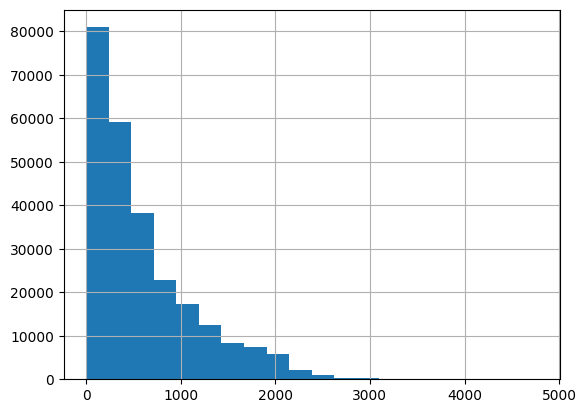

In [44]:
df_segmentation_feature['recency'].hist(bins=20)

menggunakan metode robust scaler karena ada outlier

### Distribusi Frekuensi

<Axes: >

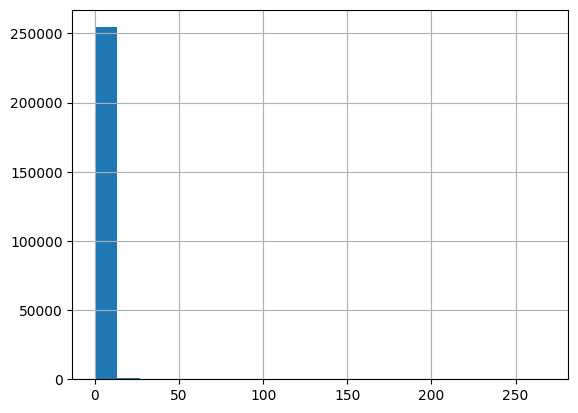

In [84]:
df_segmentation_feature['frequency'].hist(bins=20)

menggunakan metode robust scaler karena ada outlier

### Frekuensi Helpfullness

<Axes: >

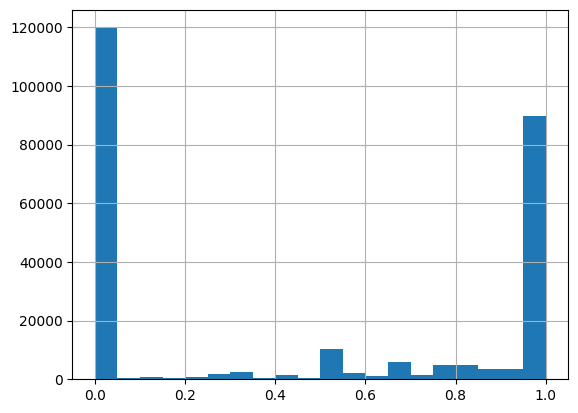

In [85]:
df_segmentation_feature['helpfulness'].hist(bins=20)

tidak perlu diubah karena sudah cukup pendek rentangnya

## Scaling

In [90]:
from sklearn.preprocessing import RobustScaler

df_segmentation_feature_scaled = df_segmentation_feature.copy()
df_segmentation_feature_scaled['recency'] = RobustScaler().fit_transform(df_segmentation_feature_scaled[['recency']])
df_segmentation_feature_scaled['frequency'] = RobustScaler().fit_transform(df_segmentation_feature_scaled[['frequency']])

df_segmentation_feature_scaled.info()
df_segmentation_feature_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Index: 256059 entries, #oc-R103C0QSV1DF5E to AZZZOVIBXHGDR
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   recency      256059 non-null  float64
 1   frequency    256059 non-null  float64
 2   helpfulness  256059 non-null  float64
dtypes: float64(3)
memory usage: 15.9+ MB


,recency,frequency,helpfulness
user_id,,,
#oc-R103C0QSV1DF5E,-0.477545,0.0,0.5
#oc-R109MU5OBBZ59U,-0.598802,0.0,0.0
#oc-R10LFEMQEW6QGZ,-0.526946,0.0,0.0
#oc-R10LT57ZGIB140,0.085329,-1.0,0.0
#oc-R10UA029WVWIUI,-0.467066,-1.0,0.0


In [91]:
df_segmentation_feature_scaled.describe()

,recency,frequency,helpfulness
count,256059.000000,256059.000000,256059.000000
mean,0.272047,0.147521,0.461018
std,0.830782,2.714222,0.461978
min,-0.618263,-1.000000,0.000000
25%,-0.350299,-1.000000,0.000000
50%,0.000000,0.000000,0.416667
75%,0.649701,0.000000,1.000000
max,6.517964,267.000000,1.000000


rentangnya masih cukup jauh tetapi masih baik, akan diubah helpfullness agar ada nilai minus (-) seperti kolom recency dan frequency

In [92]:
df_segmentation_feature_scaled['helpfulness'] = df_segmentation_feature_scaled['helpfulness']  * 2 - 1

df_segmentation_feature_scaled.info()
df_segmentation_feature_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Index: 256059 entries, #oc-R103C0QSV1DF5E to AZZZOVIBXHGDR
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   recency      256059 non-null  float64
 1   frequency    256059 non-null  float64
 2   helpfulness  256059 non-null  float64
dtypes: float64(3)
memory usage: 15.9+ MB


,recency,frequency,helpfulness
user_id,,,
#oc-R103C0QSV1DF5E,-0.477545,0.0,0.0
#oc-R109MU5OBBZ59U,-0.598802,0.0,-1.0
#oc-R10LFEMQEW6QGZ,-0.526946,0.0,-1.0
#oc-R10LT57ZGIB140,0.085329,-1.0,-1.0
#oc-R10UA029WVWIUI,-0.467066,-1.0,-1.0


In [93]:
df_segmentation_feature_scaled.describe()

,recency,frequency,helpfulness
count,256059.000000,256059.000000,256059.000000
mean,0.272047,0.147521,-0.077964
std,0.830782,2.714222,0.923956
min,-0.618263,-1.000000,-1.000000
25%,-0.350299,-1.000000,-1.000000
50%,0.000000,0.000000,-0.166667
75%,0.649701,0.000000,1.000000
max,6.517964,267.000000,1.000000


sudah cukup seimbang antara ketiga kolom

## Customer Segmentation

### Memilih cluster terbaik menggunakan metode Elbow

In [98]:
from tqdm import tqdm
from sklearn.cluster import KMeans

inertia = []

K_range = range(1,11)
for K in tqdm(K_range):
  kmeanModel = KMeans(n_clusters=K, random_state=100, n_init='auto')
  kmeanModel.fit(df_segmentation_feature_scaled)
  inertia.append(kmeanModel.inertia_)

100%|██████████| 10/10 [00:02<00:00,  4.77it/s]


Text(0.5, 1.0, 'The Elbow Method')

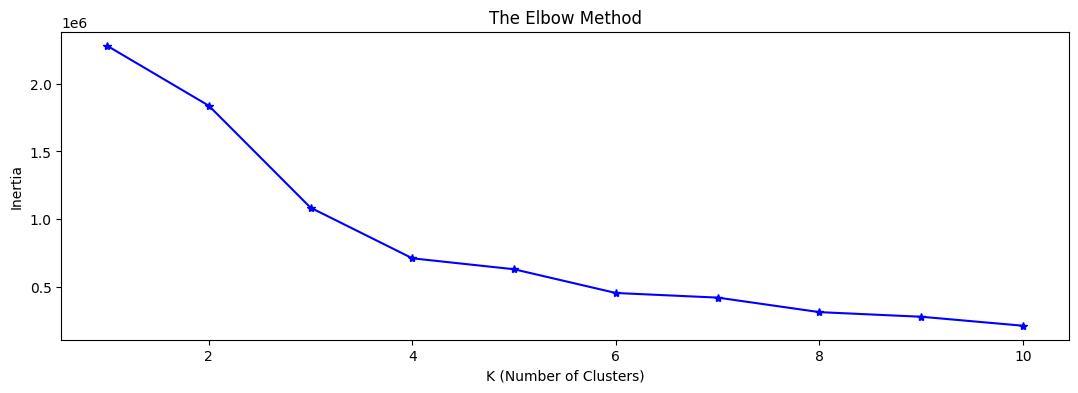

In [99]:
plt.figure(figsize=(13,4))
plt.plot(K_range, inertia, 'b*-')

plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.title('The Elbow Method')

di angka 3 grafik menurun tajam sehingga bisa menggunakan k = 3 untuk clustering ini

## Cluster dengan K = 3

In [100]:
from sklearn.cluster import KMeans

K = 3
kmeanModel = KMeans(n_clusters=K, random_state=100, n_init='auto')
kmeanModel.fit(df_segmentation_feature_scaled)

KMeans(n_clusters=3, random_state=100)

In [101]:
df_segmentation_feature_labeled = df_segmentation_feature_scaled.copy()
df_segmentation_feature_labeled['draft_label'] = kmeanModel.predict(df_segmentation_feature_scaled)
df_segmentation_feature_labeled = df_segmentation_feature_labeled.reset_index()[["user_id","draft_label"]]

df_segmentation_feature_labeled.info()
df_segmentation_feature_labeled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256059 entries, 0 to 256058
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      256059 non-null  object
 1   draft_label  256059 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 2.9+ MB


,user_id,draft_label
0,#oc-R103C0QSV1DF5E,0
1,#oc-R109MU5OBBZ59U,2
2,#oc-R10LFEMQEW6QGZ,2
3,#oc-R10LT57ZGIB140,2
4,#oc-R10UA029WVWIUI,2


### merge data

In [103]:
df_full_dataset = df_segmentation_dataset.merge(df_segmentation_feature_labeled, how='inner')

df_full_dataset.info()
df_full_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256059 entries, 0 to 256058
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       256059 non-null  object        
 1   first_active  256059 non-null  datetime64[ns]
 2   last_active   256059 non-null  datetime64[ns]
 3   recency       256059 non-null  int64         
 4   frequency     256059 non-null  int64         
 5   helpfulness   256059 non-null  float64       
 6   draft_label   256059 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(1)
memory usage: 12.7+ MB


,user_id,first_active,last_active,recency,frequency,helpfulness,draft_label
0,#oc-R103C0QSV1DF5E,2012-07-24,2012-07-24,94,1,0.5,0
1,#oc-R109MU5OBBZ59U,2012-10-13,2012-10-13,13,1,0.0,2
2,#oc-R10LFEMQEW6QGZ,2012-08-26,2012-08-26,61,1,0.0,2
3,#oc-R10LT57ZGIB140,2011-07-14,2011-07-14,470,0,0.0,2
4,#oc-R10UA029WVWIUI,2012-07-17,2012-07-17,101,0,0.0,2


Setelah mengetahui labet tiap user id, menggunakan random scaler untuk mengetahui lebih dalam karakteristik tiap cluster


In [104]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth=2, random_state=100, class_weight='balanced')
dtclf.fit(df_full_dataset[['recency', 'frequency', 'helpfulness']], df_full_dataset['draft_label'].astype(str).values.ravel())

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=100)

In [113]:
df_full_dataset['label'] = dtclf.predict(df_full_dataset[['recency', 'frequency', 'helpfulness']])

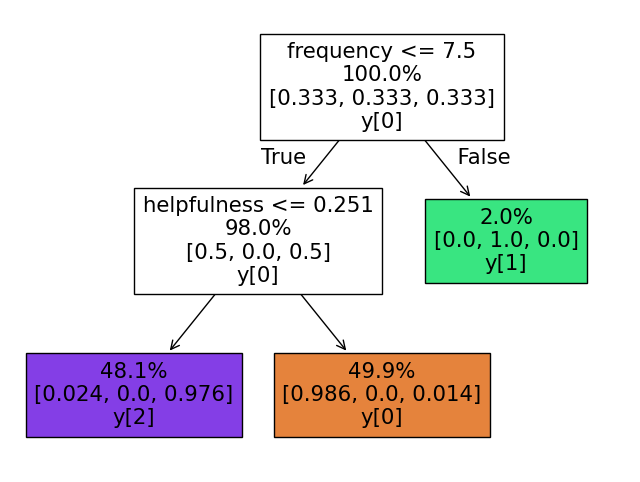

In [106]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6));
plot_tree(
    dtclf, impurity=False, filled=True, class_names=True, label='none', proportion=True,
    feature_names=['recency', 'frequency', 'helpfulness']
);
plt.show();

Interpretasi dari cluster:
<br> **Cluster 0** adalah orang yang tidak terlalu sering untuk review tetapi sangat membantu (helpfulness score > 0.25) sehingga kita bisa memberi nama mereka: **Helpful Heroes**
<br> **Cluster 1** adalah orang yang sering sekali menulis review sehingga kita bisa beri nama: **Review Addicts**
<br> **Cluster 2** adalah orang yang tidak terlalu sering memberi review tetapi tidak membantu (helpfullness score <= 0.25) : **Bad Reviewer**

Sehingga kita bisa lebih memahami cluster dengan lebih baik

In [114]:
df_full_dataset['label'] = df_full_dataset['label'].replace({"0":"helpfull heroes","1":"review addicts","2":"bad reviewer"})
df_full_dataset.info()
df_full_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256059 entries, 0 to 256058
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       256059 non-null  object        
 1   first_active  256059 non-null  datetime64[ns]
 2   last_active   256059 non-null  datetime64[ns]
 3   recency       256059 non-null  int64         
 4   frequency     256059 non-null  int64         
 5   helpfulness   256059 non-null  float64       
 6   draft_label   256059 non-null  int32         
 7   label         256059 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(2)
memory usage: 14.7+ MB


,user_id,first_active,last_active,recency,frequency,helpfulness,draft_label,label
0,#oc-R103C0QSV1DF5E,2012-07-24,2012-07-24,94,1,0.5,0,helpfull heroes
1,#oc-R109MU5OBBZ59U,2012-10-13,2012-10-13,13,1,0.0,2,bad reviewer
2,#oc-R10LFEMQEW6QGZ,2012-08-26,2012-08-26,61,1,0.0,2,bad reviewer
3,#oc-R10LT57ZGIB140,2011-07-14,2011-07-14,470,0,0.0,2,bad reviewer
4,#oc-R10UA029WVWIUI,2012-07-17,2012-07-17,101,0,0.0,2,bad reviewer


In [115]:
from sklearn.tree import DecisionTreeClassifier

final_dtclf = DecisionTreeClassifier(max_depth=2, random_state=100, class_weight='balanced')
final_dtclf.fit(df_full_dataset[['recency', 'frequency', 'helpfulness']], df_full_dataset['label'].astype(str).values.ravel())

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=100)

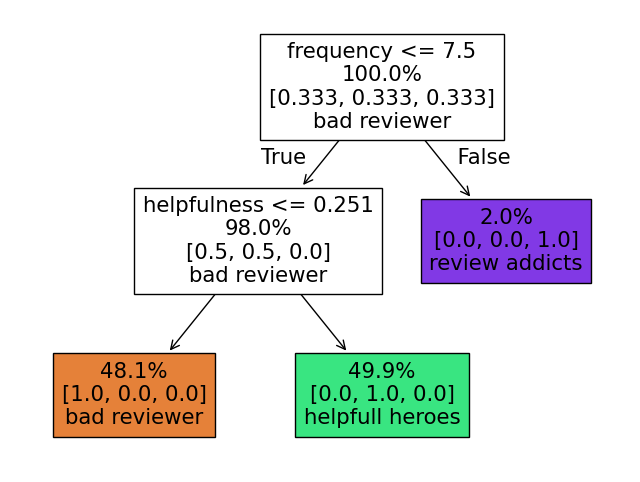

In [116]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6));
plot_tree(
    final_dtclf, impurity=False, filled=True, class_names=final_dtclf.classes_, label='none', proportion=True,
    feature_names=['recency', 'frequency', 'helpfulness']
);
plt.show();

# Summary

Sekarang akan lebih mudah untuk interpretasikan clusternya, sebagai berikut:

<br> **Helpfull Heroes:** aadalah orang yang tidak terlalu sering untuk review tetapi sangat membantu (helpfulness score > 0.25)
<br> **Review Addicts :** orang yang sering sekali menulis review (frekuensinya >= 7 )
<br> **Bad Reviewer :** orang yang memberi review tidak membantu (helpfullness score <= 0.25)

# Suggested actions

**Sebagai pelaku bisnis kita bisa menanggapinya dengan cara:**

<br> **Helpfull Heroes:** memberikan diskon kepada mereka apabila menuliskan review yang positif dikemudian hari untuk mengapresiasi review positif mereka
<br> **Review Addicts :** menghubungi mereka untuk menawarkan kerjasama dalam memasarkan produk baru
<br> **Bad Reviewer :** menghubungi mereka apakah ada hal yang salah dari produk yang mereka nilai atau hiraukan saja komentar mereka

## Cluster Visualization


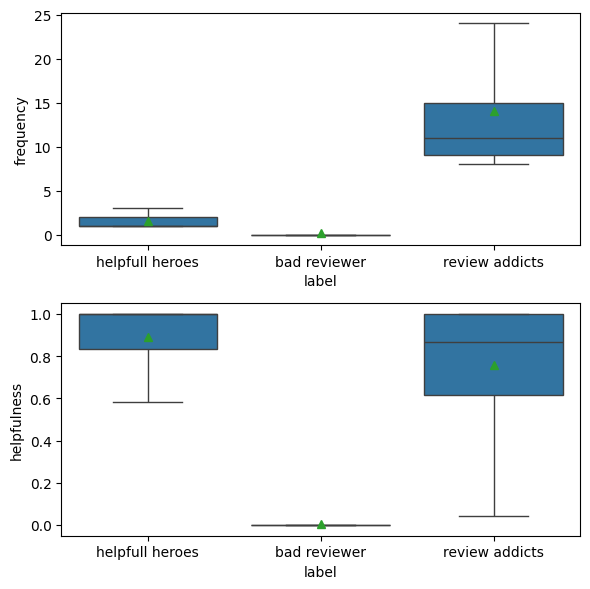

In [117]:
selected_columns = ['frequency', 'helpfulness']
n_baris = len(selected_columns)

fig, axes = plt.subplots(n_baris, 1, figsize=(6,6))

for i, nama_kol in enumerate(selected_columns):
  sns.boxplot(df_full_dataset, x='label', y=nama_kol, ax=axes.flatten()[i], showmeans=True, showfliers=False)

plt.tight_layout()
plt.show()